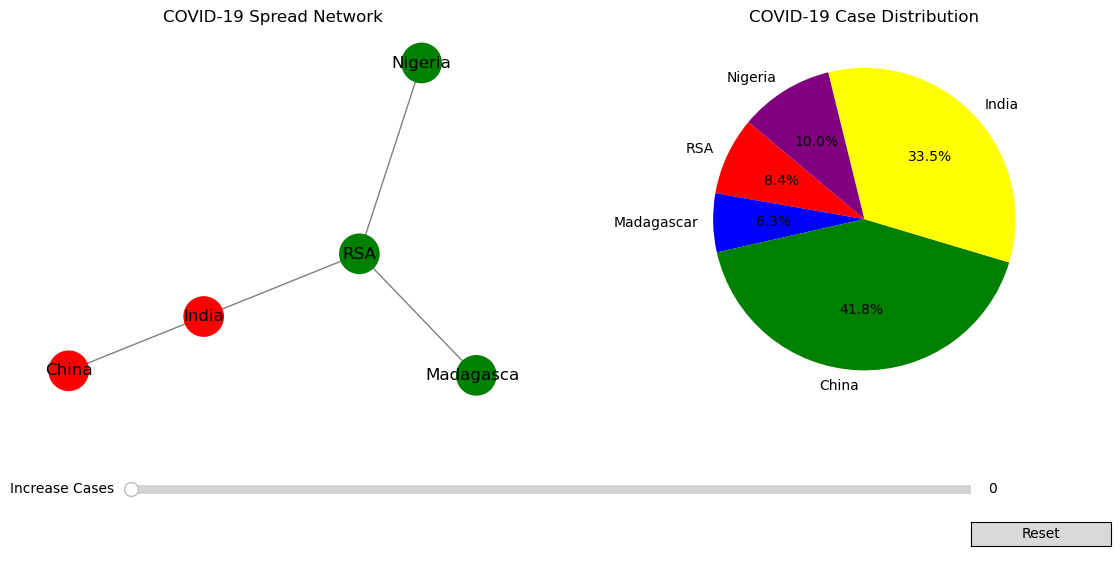

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.widgets import Slider, Button

# Step 1: Create Data
data = {
    "RSA": {"cases": 1000, "deaths": 50},
    "Madagascar": {"cases": 750, "deaths": 30},
    "China": {"cases": 5000, "deaths": 300},
    "India": {"cases": 4000, "deaths": 200},
    "Nigeria": {"cases": 1200, "deaths": 70}
}
connections = [("RSA", "Madagascar"), ("China", "India"), ("India", "RSA"), ("Nigeria", "RSA")]

# Extract country names and values
countries = list(data.keys())
cases = [data[country]["cases"] for country in countries]
deaths = [data[country]["deaths"] for country in countries]

# Step 2: Create the Network Graph
def create_network(countries, connections):
    G = nx.Graph()
    G.add_nodes_from(countries)
    G.add_edges_from(connections)
    return G

network = create_network(countries, connections)

# Step 3: Draw the Graph
def draw_graph(G, cases, deaths, ax):
    ax.clear()  # Clear the axis to update
    pos = nx.spring_layout(G)
    node_colors = ["red" if cases[i] > 2000 else "green" for i in range(len(countries))]
    nx.draw(G, pos, ax=ax, with_labels=True, node_color=node_colors, node_size=800, edge_color="gray")
    labels = {node: f"{node}\n{cases[i]} cases\n{deaths[i]} deaths" for i, node in enumerate(countries)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)
    ax.set_title("COVID-19 Spread Network")

# Step 4: Draw the Pie Chart
def draw_pie_chart(countries, cases, ax):
    ax.clear()  # Clear the axis to update
    ax.pie(cases, labels=countries, autopct='%1.1f%%', startangle=140, colors=["red", "blue", "green", "yellow", "purple"])
    ax.set_title("COVID-19 Case Distribution")

# Step 5: Interactive Functionality
def interactive_visualization():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    plt.subplots_adjust(bottom=0.25)

    # Initial Graph and Pie Chart
    draw_graph(network, cases, deaths, axes[0])
    draw_pie_chart(countries, cases, axes[1])

    # Slider to Adjust Cases
    ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])  # Position of the slider
    slider = Slider(ax_slider, 'Increase Cases', 0, 1000, valinit=0, valstep=50)

    def update(val):
        increase = slider.val
        updated_cases = [data[country]["cases"] + increase for country in countries]

        # Redraw Graph and Pie Chart
        draw_graph(network, updated_cases, deaths, axes[0])
        draw_pie_chart(countries, updated_cases, axes[1])
        fig.canvas.draw_idle()  # Refresh the canvas

    slider.on_changed(update)

    # Reset Button
    ax_button = plt.axes([0.8, 0.02, 0.1, 0.04])
    button = Button(ax_button, 'Reset')

    def reset(event):
        slider.reset()

    button.on_clicked(reset)

    plt.show()

# Run the Visualization
interactive_visualization()


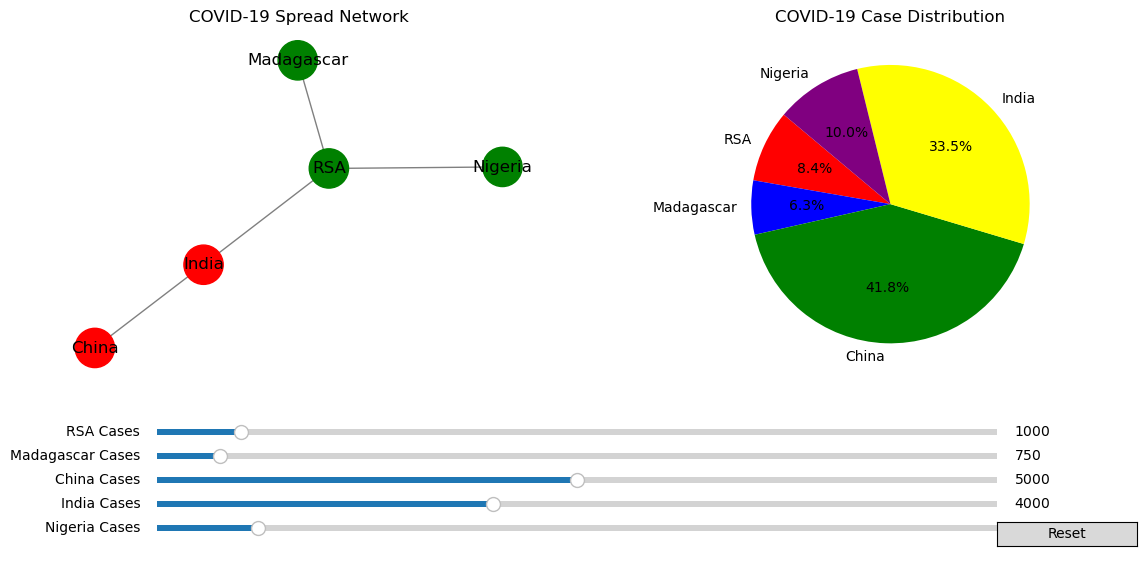

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.widgets import Slider, Button

# Step 1: Initial Data Setup
data = {
    "RSA": {"cases": 1000, "deaths": 50},
    "Madagascar": {"cases": 750, "deaths": 30},
    "China": {"cases": 5000, "deaths": 300},
    "India": {"cases": 4000, "deaths": 200},
    "Nigeria": {"cases": 1200, "deaths": 70}
}
connections = [("RSA", "Madagascar"), ("China", "India"), ("India", "RSA"), ("Nigeria", "RSA")]

# Extract country names and initialize values
countries = list(data.keys())
cases = [data[country]["cases"] for country in countries]
deaths = [data[country]["deaths"] for country in countries]

# Step 2: Create the Network Graph
def create_network(countries, connections):
    G = nx.Graph()
    G.add_nodes_from(countries)
    G.add_edges_from(connections)
    return G

network = create_network(countries, connections)

# Step 3: Draw the Graph
def draw_graph(G, cases, deaths, ax):
    ax.clear()  # Clear the axis to update
    pos = nx.spring_layout(G)
    node_colors = ["red" if cases[i] > 2000 else "green" for i in range(len(countries))]
    nx.draw(G, pos, ax=ax, with_labels=True, node_color=node_colors, node_size=800, edge_color="gray")
    labels = {node: f"{node}\n{cases[i]} cases\n{deaths[i]} deaths" for i, node in enumerate(countries)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)
    ax.set_title("COVID-19 Spread Network")

# Step 4: Draw the Pie Chart
def draw_pie_chart(countries, cases, ax):
    ax.clear()  # Clear the axis to update
    ax.pie(cases, labels=countries, autopct='%1.1f%%', startangle=140, colors=["red", "blue", "green", "yellow", "purple"])
    ax.set_title("COVID-19 Case Distribution")

# Step 5: Interactive Visualization with Sliders
def interactive_visualization():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    plt.subplots_adjust(bottom=0.3)

    # Initial Graph and Pie Chart
    draw_graph(network, cases, deaths, axes[0])
    draw_pie_chart(countries, cases, axes[1])

    # Sliders for Each Country
    sliders = {}
    slider_axes = {}
    for i, country in enumerate(countries):
        slider_axes[country] = plt.axes([0.2, 0.2 - i * 0.04, 0.6, 0.02])  # Adjust vertical position
        sliders[country] = Slider(slider_axes[country], f"{country} Cases", 0, 10000, valinit=data[country]["cases"], valstep=50)

    def update(val):
        updated_cases = [sliders[country].val for country in countries]

        # Update the graphs with new case numbers
        draw_graph(network, updated_cases, deaths, axes[0])
        draw_pie_chart(countries, updated_cases, axes[1])
        fig.canvas.draw_idle()  # Refresh the canvas

    # Attach the update function to all sliders
    for slider in sliders.values():
        slider.on_changed(update)

    # Reset Button
    ax_button = plt.axes([0.8, 0.02, 0.1, 0.04])
    button = Button(ax_button, 'Reset')

    def reset(event):
        for country, slider in sliders.items():
            slider.reset()

    button.on_clicked(reset)

    plt.show()

# Run the Visualization
interactive_visualization()


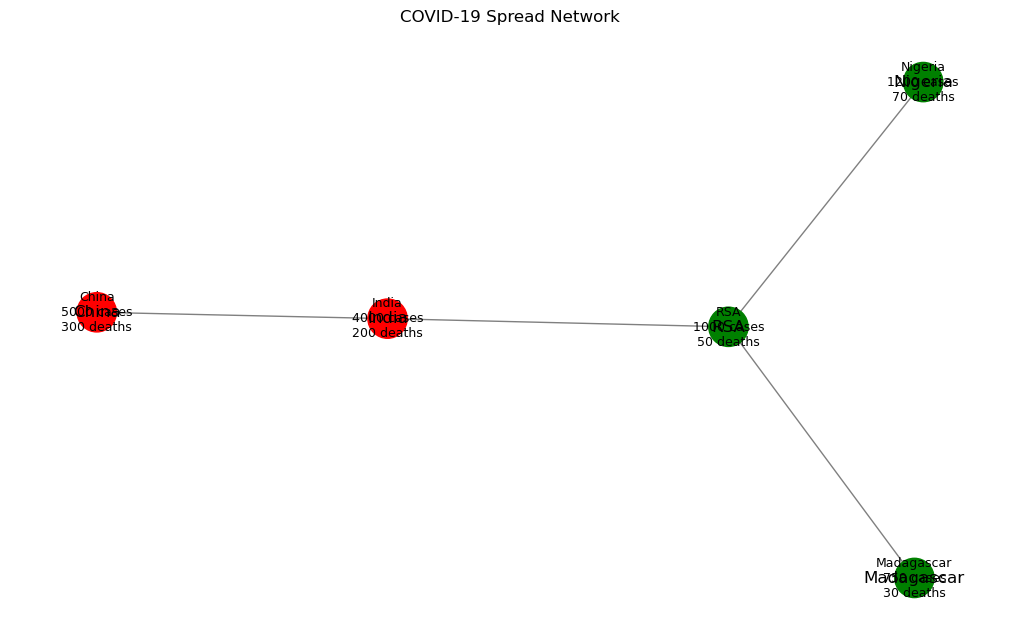

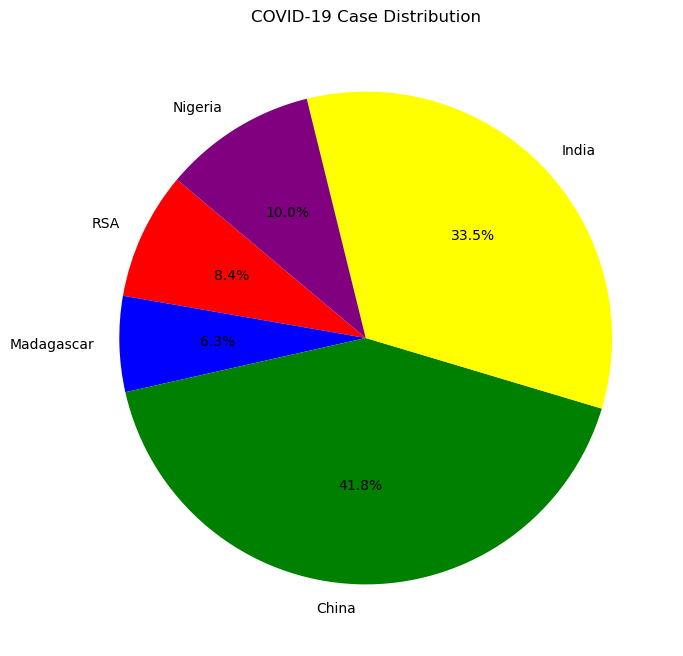

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Initial Data
data = {
    "RSA": {"cases": 1000, "deaths": 50},
    "Madagascar": {"cases": 750, "deaths": 30},
    "China": {"cases": 5000, "deaths": 300},
    "India": {"cases": 4000, "deaths": 200},
    "Nigeria": {"cases": 1200, "deaths": 70}
}
connections = [("RSA", "Madagascar"), ("China", "India"), ("India", "RSA"), ("Nigeria", "RSA")]

# Extract Data
countries = list(data.keys())
cases = [data[country]["cases"] for country in countries]
deaths = [data[country]["deaths"] for country in countries]

# Create Network
def create_network(countries, connections):
    G = nx.Graph()
    G.add_nodes_from(countries)
    G.add_edges_from(connections)
    return G

network = create_network(countries, connections)

# Draw Network Graph
def draw_graph(G, cases, deaths):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    node_colors = ["red" if cases[i] > 2000 else "green" for i in range(len(countries))]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="gray")
    labels = {node: f"{node}\n{cases[i]} cases\n{deaths[i]} deaths" for i, node in enumerate(countries)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)
    plt.title("COVID-19 Spread Network")
    plt.show()

# Draw Pie Chart
def draw_pie_chart(countries, cases):
    plt.figure(figsize=(8, 8))
    plt.pie(cases, labels=countries, autopct='%1.1f%%', startangle=140, colors=["red", "blue", "green", "yellow", "purple"])
    plt.title("COVID-19 Case Distribution")
    plt.show()

# Draw Static Visualizations
draw_graph(network, cases, deaths)
draw_pie_chart(countries, cases)


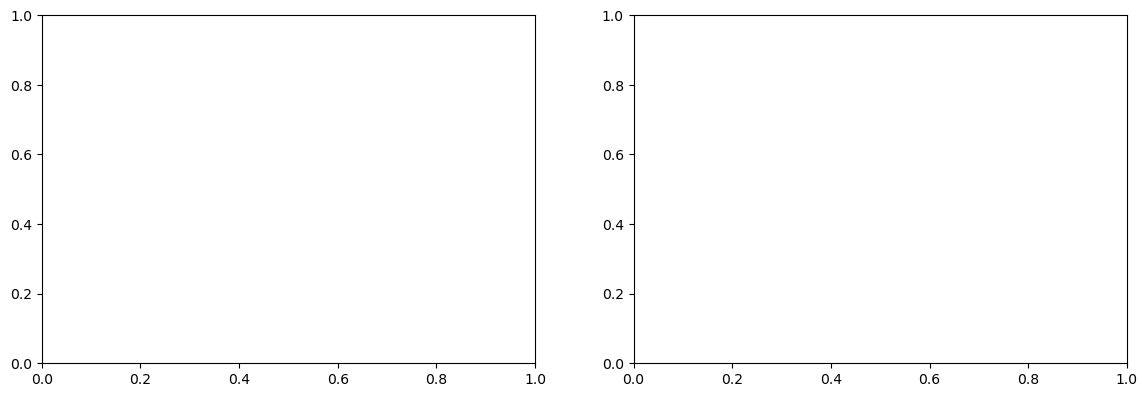

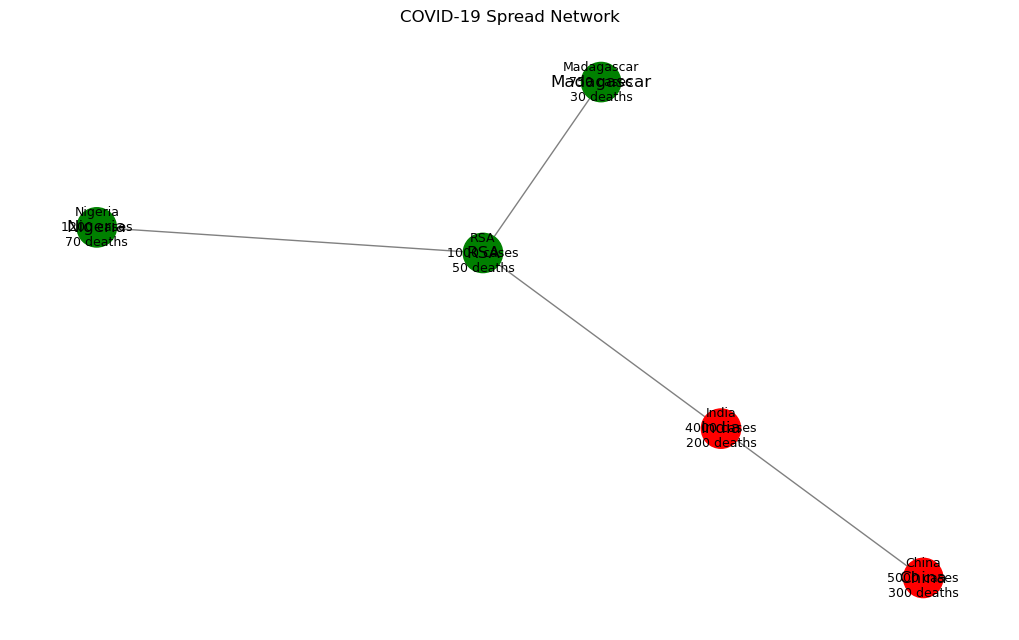

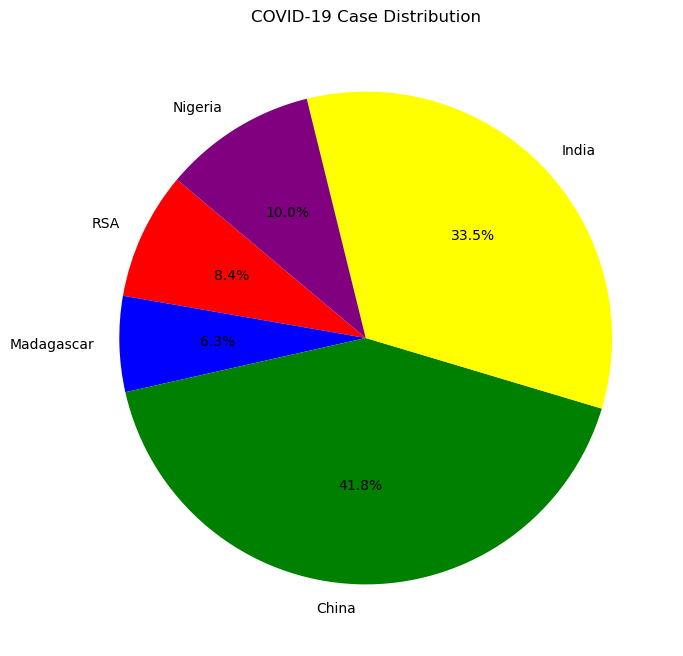

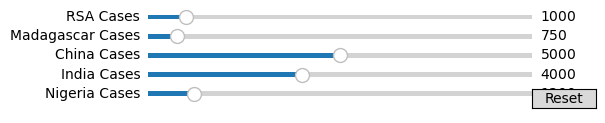

In [8]:
from matplotlib.widgets import Slider, Button

# Interactive Visualization
def interactive_visualization():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    plt.subplots_adjust(bottom=0.3)

    # Initial Graph and Pie Chart
    draw_graph(network, cases, deaths)
    draw_pie_chart(countries, cases)

    # Sliders for Each Country
    sliders = {}
    slider_axes = {}
    for i, country in enumerate(countries):
        slider_axes[country] = plt.axes([0.2, 0.2 - i * 0.04, 0.6, 0.02])  # Adjust vertical position
        sliders[country] = Slider(slider_axes[country], f"{country} Cases", 0, 10000, valinit=data[country]["cases"], valstep=50)

    def update(val):
        updated_cases = [sliders[country].val for country in countries]

        # Update Graph and Pie Chart
        axes[0].clear()
        axes[1].clear()
        draw_graph(network, updated_cases, deaths)
        draw_pie_chart(countries, updated_cases)
        fig.canvas.draw_idle()  # Refresh the canvas

    # Attach the update function to all sliders
    for slider in sliders.values():
        slider.on_changed(update)

    # Reset Button
    ax_button = plt.axes([0.8, 0.02, 0.1, 0.04])
    button = Button(ax_button, 'Reset')

    def reset(event):
        for country, slider in sliders.items():
            slider.reset()

    button.on_clicked(reset)

    plt.show()

# Run Interactive Visualization
interactive_visualization()
